# Árvores de Decisão 🌳

In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv'

data = pd.read_csv(url)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'

In [3]:
data_clf = data[features + [target]].copy()
data_clf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [4]:
data_clf['Age'] = data_clf['Age'].fillna(data_clf['Age'].mean())
data_clf['Embarked'] = data_clf['Embarked'].fillna(data_clf['Embarked'].mode()[0])

In [5]:
data_clf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
 7   Survived  891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in ['Sex', 'Embarked']:
    label_encoders[col] = LabelEncoder()
    data_clf[col] = label_encoders[col].fit_transform(data_clf[col])

In [7]:
from sklearn.model_selection import train_test_split

X = data_clf.drop('Survived', axis = 1)
y = data_clf['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, random_state = 42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [9]:
y_pred = clf.predict(X_test)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print('Acurácia:', accuracy_score(y_test, y_pred))

[[92 13]
 [23 51]]
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Acurácia: 0.7988826815642458


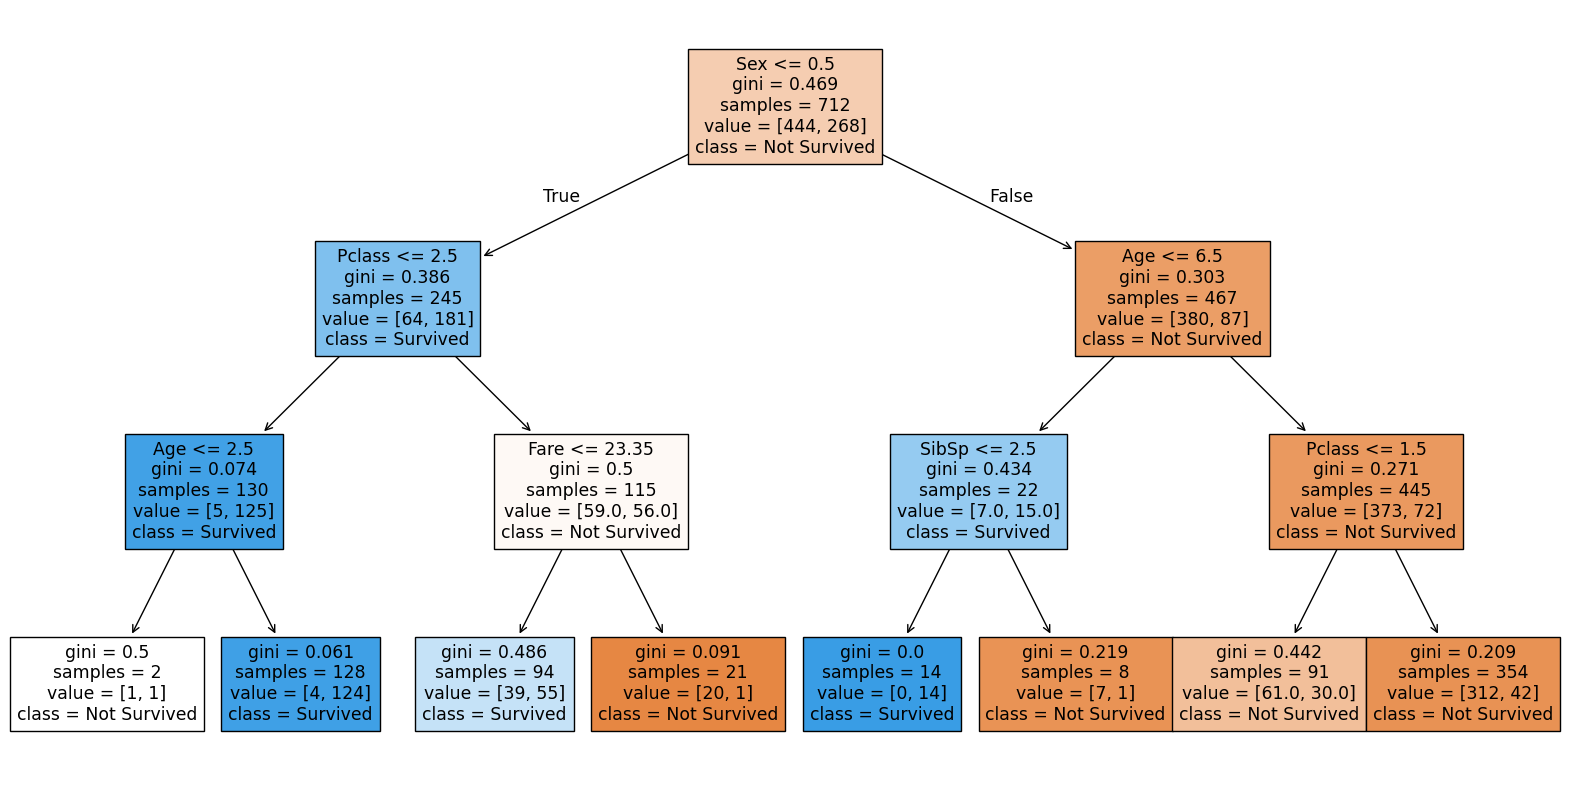

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.show()

In [12]:
importancia_variaveis = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
importancia_variaveis.sort_values(ascending=False)
importancia_variaveis

Sex         0.605737
Pclass      0.209536
Age         0.075353
Fare        0.061240
SibSp       0.048135
Parch       0.000000
Embarked    0.000000
dtype: float64

In [13]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']
target = 'Fare'

data = data[features + [target]].copy()

label_encoders = {}

for col in ['Sex', 'Embarked']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

In [14]:
# dividir entre treino e teste
X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

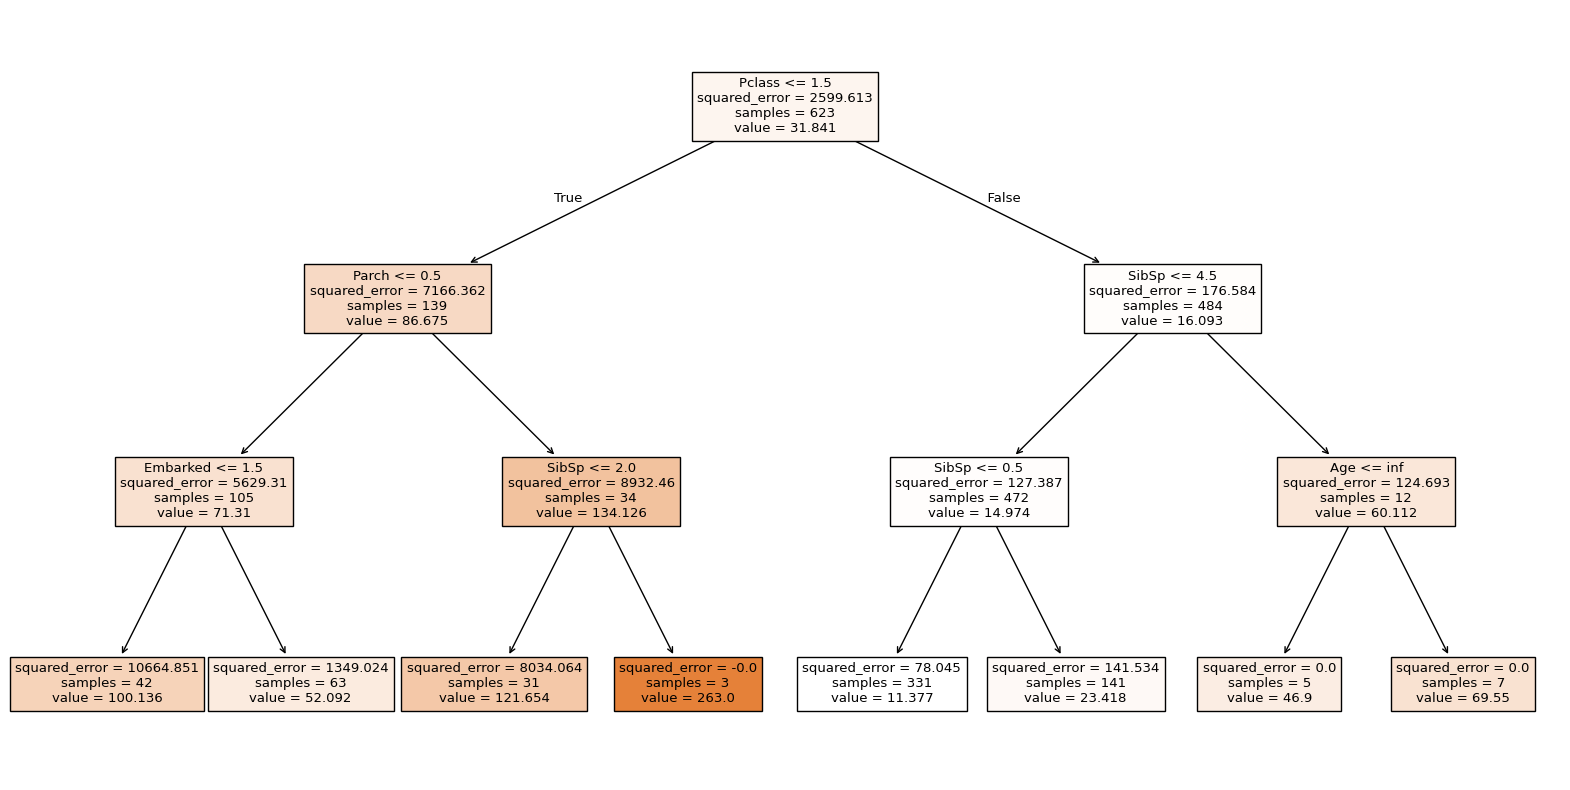

In [15]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(max_depth=3, random_state = 42)
regressor.fit(X_train, y_train)


plt.figure(figsize=(20, 10))
plot_tree(regressor, filled=True, feature_names=X.columns)
plt.show()

In [16]:
from sklearn.model_selection import KFold, cross_val_score

# Criar o objeto KFold com 5 folds
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Aplicar a validação cruzada e obter os scores
scores = cross_val_score(regressor, X, y, cv=kf, scoring='neg_mean_squared_error')

# Imprimir os scores de cada fold e a média dos scores
print("Scores dos folds:", scores)
print("Média dos scores:", scores.mean())

Scores dos folds: [ -946.84177451  -662.51346574 -1028.87049502  -280.48393123
  -822.30061497  -670.67954218 -4979.86944526 -2820.54731768
  -474.74153535  -582.42955767]
Média dos scores: -1326.9277679611994
